In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from skimage import io
from skimage.util import random_noise
from skimage.transform import resize
import matplotlib.pyplot as plt

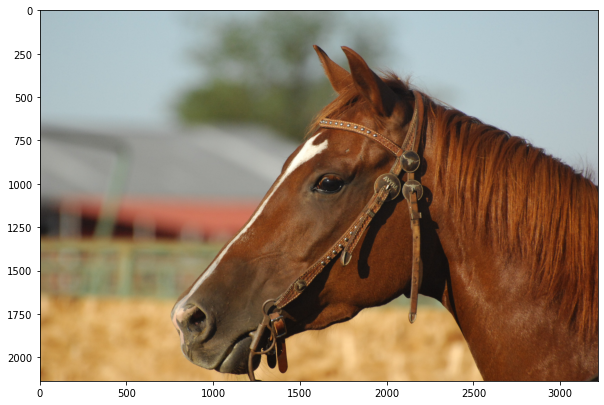

In [3]:
horse = io.imread('data/images/horse.jpg')
plt.figure(figsize=(10,10))
plt.imshow(horse);

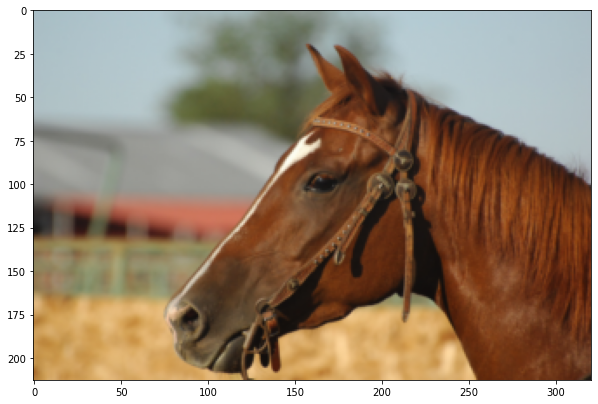

In [4]:
horse = resize(horse, (int(horse.shape[0]/10), int(horse.shape[1]/10)))
plt.figure(figsize=(10,10))
plt.imshow(horse);

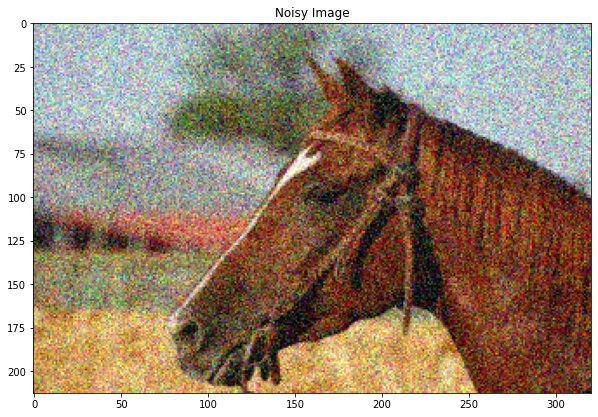

In [6]:
sigma = 0.155 # Higher values will result in more noise
noisy_horse = random_noise(horse, mode='gaussian', var=sigma**2)
plt.figure(figsize=(10,10))
plt.title('Noisy Image')
plt.imshow(noisy_horse);

In [7]:
from skimage.restoration import (denoise_tv_chambolle,
                                    denoise_bilateral,
                                    denoise_wavelet,
                                    estimate_sigma)

In [8]:
sigma_est = estimate_sigma(noisy_horse, multichannel=True, average_sigmas=True)
print('Estimated Gaussian noise standard deviation = {}'.format(sigma_est))

Estimated Gaussian noise standard deviation = 0.1451653403074748


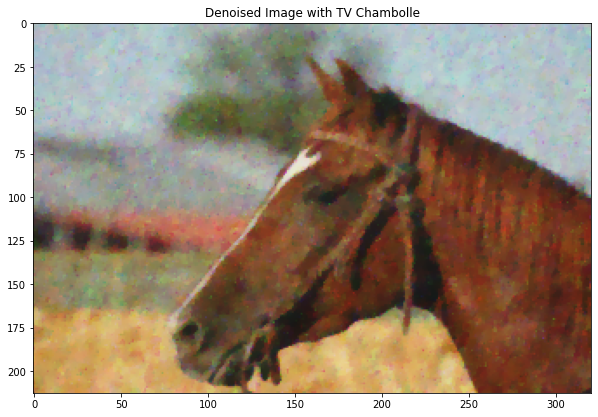

In [9]:
plt.figure(figsize=(10,10))
plt.title('Denoised Image with TV Chambolle')
plt.imshow(denoise_tv_chambolle(noisy_horse, weight=0.1, multichannel=True));

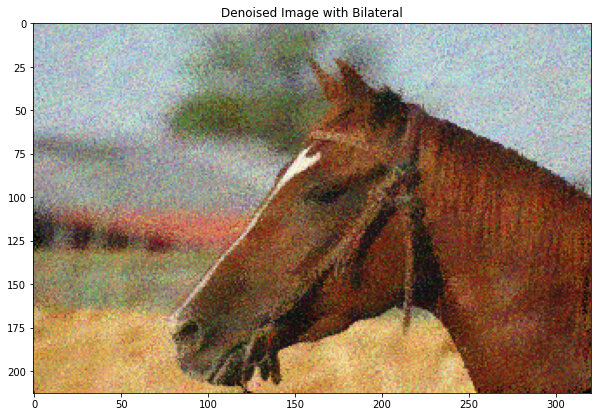

In [10]:
plt.figure(figsize=(10,10))
plt.title('Denoised Image with Bilateral')
plt.imshow(denoise_bilateral(noisy_horse, sigma_color=0.05, sigma_spatial=2, multichannel=True));

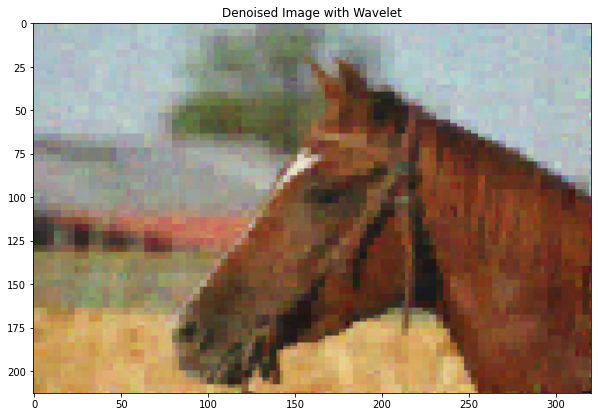

In [11]:
plt.figure(figsize=(10,10))
plt.title('Denoised Image with Wavelet')
plt.imshow(denoise_wavelet(noisy_horse, multichannel=True));